# STA 208: Homework 4 (Do not distribute)

## Due 06/03/2022 midnight (11:59pm)

__Instructions:__ 

1. Submit your homework using one file name ”LastName_FirstName_hw4.html” on canvas. 
2. Your code should be readable; writing a piece of code should be compared to writing a page of a book. Adopt the one-statement-per-line rule. Consider splitting a lengthy statement into multiple lines to improve readability. (You will lose one point for each line that does not follow the one-statementper-line rule)
3. To help understand and maintain code, you should always add comments to explain your code. (homework with no comments will receive 0 points). For a very long comment, please break it into multiple lines.
4. In your Jupyter Notebook, put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text.
4. Please make sure to print out the necessary results to avoid losing points. We should not run your code to figure out your answers. 
5. However, also make sure we are able to open this notebook and run everything here by running the cells in sequence; in case that the TA wants to check the details.
6. You will be graded on correctness of your code efficiency and succinctness, and conclusions and modelling decisions


### Exercise 3 (Kernel density estimation)

_If you do not have time to complete this question, you can submit your solution with hw4. You will not lose any penalty points if you choose to do so._

The data set ``n90_pol.csv`` contains information on 90 British university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views.

The variables ``amygdala`` and ``acc`` indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar anatomical variables. The variable ``orientation`` gives the subjects’ locations on a five-point scale from 1 (very conservative) to 5 (very liberal). orientation is an ordinal but not a metric variable, so scores of 1 and 2 are not necessarily as far apart as scores of 2 and 3.

1. Estimate the probability density for the volume of the amygdala. Plot it and report the bandwidth. Repeat this for the volume of the ACC.

__Solution__:

In [222]:
# Importing required libraries
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as kernels
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats
import seaborn as sns

In [170]:
# Loading the data
data = pd.read_csv('n90_pol.csv')

# Getting individual columns as numpy arrays
amygdala = data["amygdala"].to_numpy().reshape(-1,1)
acc = data["acc"].to_numpy().reshape(-1,1)

In [171]:
# Getting the silverman and scott bandwidths
def silverman_bandwidth(x):
    # Calculating the standard deviation of the data
    sigma = np.std(x, ddof = 1)
    
    # Calculating the Silverman bandwidth
    return 0.9 * sigma * np.power(len(x), -0.2)


def scotts_bandwidth(x):
    # Calculating the standard deviation of the data
    sigma = np.std(x, ddof = 1)
    
    # Calculating the Scott bandwidth
    return 1.05 * sigma * np.power(len(x), -0.2)

In [172]:
# Getting the Silverman and Scott bandwidths
amy_silverman = silverman_bandwidth(amygdala)
amy_scott = scotts_bandwidth(amygdala)

# Getting the bandwidth based on cross validation
bws = 10 ** np.linspace(-6,6,100)

amy_grid = GridSearchCV(KernelDensity(kernel = 'gaussian'),
                        param_grid=dict(bandwidth = bws))

amy_grid.fit(amygdala)

loocv_bw = amy_grid.best_estimator_.bandwidth

In [173]:
amygdala_range = np.linspace(np.min(amygdala), np.max(amygdala), 1000).reshape(-1,1)
silverman_model = KernelDensity(kernel = 'gaussian', bandwidth = amy_silverman)
scott_model = KernelDensity(kernel = 'gaussian', bandwidth = amy_scott)
cv_model = KernelDensity(kernel = 'gaussian', bandwidth = loocv_bw)

silverman_model.fit(amygdala)
scott_model.fit(amygdala)
cv_model.fit(amygdala)

KernelDensity(bandwidth=0.00572236765935022)

Text(0.5, 1.0, 'Density estimation for amygdala')

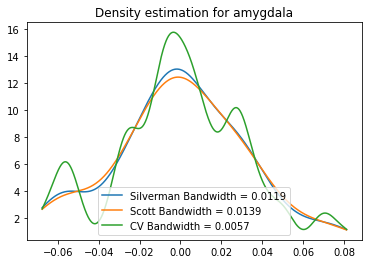

In [174]:
# plt.plot(amygdala, label = 'amygdala')
plt.plot(amygdala_range,np.exp(silverman_model.score_samples(amygdala_range)), label = 'Silverman Bandwidth = {:.4f}'.format(amy_silverman))
plt.plot(amygdala_range,np.exp(scott_model.score_samples(amygdala_range)), label = 'Scott Bandwidth = {:.4f}'.format(amy_scott))
plt.plot(amygdala_range,np.exp(cv_model.score_samples(amygdala_range)), label = 'CV Bandwidth = {:.4f}'.format(loocv_bw))
plt.legend(loc = 'lower center')
plt.title('Density estimation for amygdala')


In [175]:
# Getting the Silverman and Scott bandwidths
acc_silverman = silverman_bandwidth(acc)
acc_scott = scotts_bandwidth(acc)

# Getting the bandwidth based on cross validation
bws = 10 ** np.linspace(-6,6,100)

acc_grid = GridSearchCV(KernelDensity(kernel = 'gaussian'),
                        param_grid=dict(bandwidth = bws))

acc_grid.fit(acc)

loocv_bw = acc_grid.best_estimator_.bandwidth

In [176]:
acc_range = np.linspace(np.min(acc), np.max(acc), 1000).reshape(-1,1)
silverman_model = KernelDensity(kernel = 'gaussian', bandwidth = acc_silverman)
scott_model = KernelDensity(kernel = 'gaussian', bandwidth = acc_scott)
cv_model = KernelDensity(kernel = 'gaussian', bandwidth = loocv_bw)

silverman_model.fit(acc)
scott_model.fit(acc)
cv_model.fit(acc)

KernelDensity(bandwidth=0.0032745491628777285)

Text(0.5, 1.0, 'Density estimation for Acc')

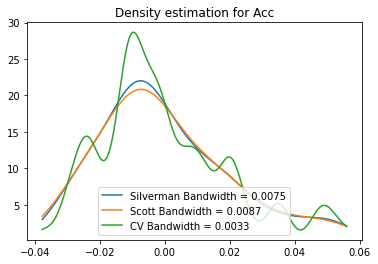

In [177]:
plt.plot(acc_range,np.exp(silverman_model.score_samples(acc_range)), label = 'Silverman Bandwidth = {:.4f}'.format(acc_silverman))
plt.plot(acc_range,np.exp(scott_model.score_samples(acc_range)), label = 'Scott Bandwidth = {:.4f}'.format(acc_scott))
plt.plot(acc_range,np.exp(cv_model.score_samples(acc_range)), label = 'CV Bandwidth = {:.4f}'.format(loocv_bw))
plt.legend(loc = 'lower center')
plt.title('Density estimation for Acc')

2. Estimate a joint probability density for the volumes of the amygdala and the ACC. What are the bandwidths? Are they the same as the bandwidths you got in problem 1? Should they be?


In [189]:
joint_data = np.concatenate((amygdala, acc), axis = 1)

joint_grid = GridSearchCV(KernelDensity(kernel = 'gaussian'), param_grid=dict(bandwidth = bws), cv = LeaveOneOut())

joint_grid.fit(joint_data)


GridSearchCV(cv=LeaveOneOut(), estimator=KernelDensity(),
             param_grid={'bandwidth': array([1.00000000e-06, 1.32194115e-06, 1.74752840e-06, 2.31012970e-06,
       3.05385551e-06, 4.03701726e-06, 5.33669923e-06, 7.05480231e-06,
       9.32603347e-06, 1.23284674e-05, 1.62975083e-05, 2.15443469e-05,
       2.84803587e-05, 3.76493581e-05, 4.97702356e-05, 6.57933225e-05,
       8.69749003e-05, 1.149757...
       1.62975083e+03, 2.15443469e+03, 2.84803587e+03, 3.76493581e+03,
       4.97702356e+03, 6.57933225e+03, 8.69749003e+03, 1.14975700e+04,
       1.51991108e+04, 2.00923300e+04, 2.65608778e+04, 3.51119173e+04,
       4.64158883e+04, 6.13590727e+04, 8.11130831e+04, 1.07226722e+05,
       1.41747416e+05, 1.87381742e+05, 2.47707636e+05, 3.27454916e+05,
       4.32876128e+05, 5.72236766e+05, 7.56463328e+05, 1.00000000e+06])})

In [191]:
print("LOOCV Bandwidth estimate: {}".format(joint_grid.best_estimator_.bandwidth))

LOOCV Bandwidth estimate: 0.01


In [199]:
# Using scipy to estimate the kernel density
scipy_kde = stats.gaussian_kde(joint_data.T, bw_method='silverman')

print("Silverman Bws : {}".format(scipy_kde.covariance_factor() * np.std(joint_data, ddof=1, axis=0)))

# Using scipy to estimate the kernel density
scipy_kde = stats.gaussian_kde(joint_data.T, bw_method='scott')

print("Scott Bws : {}".format(scipy_kde.covariance_factor() * np.std(joint_data, ddof=1, axis=0)))

Silverman Bws : [0.01540218 0.0096533 ]
Scott Bws : [0.01540218 0.0096533 ]


The silverman bandwidths for the joint data do not match the bandwidths for the individual data. This is because of the influence of the dimensionality of the joint data as well as the covariance of the data. Note that Sk-Learn returns a scalar value since it assumes isometric  gaussian variance 

3. Plot the joint density. Does it suggest the two volumes are statistically independent? Should they be? You may use three dimensions, color, contours, etc., for your plot, but you will be graded, in part, on how easy to read it is. (Hint: Remember that the random variables $X$ and $Y$ are statistically independent when their joint pdf is the product of their marginal pdfs, $p(x, y) = p(x)p(y)$. Think about what the product of your estimated pdfs from question 1 would look like.

In [255]:
joint_data_range = np.linspace(np.min(joint_data), np.max(joint_data), 1000).reshape(-1,2)

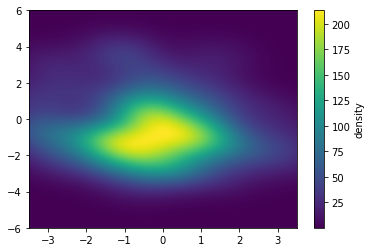

In [256]:
Xgrid, Ygrid = np.meshgrid(joint_data_range[:,0], joint_data_range[:,1])
kde_estimate = scipy_kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
plt.imshow(kde_estimate.reshape(Xgrid.shape),
                   origin='lower', aspect='auto',
                   extent=[-3.5, 3.5, -6, 6],
                   cmap='viridis')
cb = plt.colorbar()
cb.set_label("density")

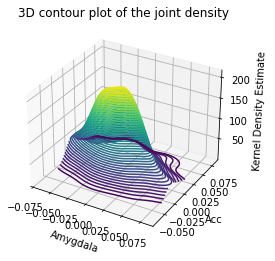

In [275]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Xgrid, Ygrid, kde_estimate.reshape(Xgrid.shape), 50, cmap='viridis')
ax.set_xlabel('Amygdala')
ax.set_ylabel('Acc')
ax.set_zlabel('Kernel Density Estimate')
ax.set_title('3D contour plot of the joint density')
plt.show()

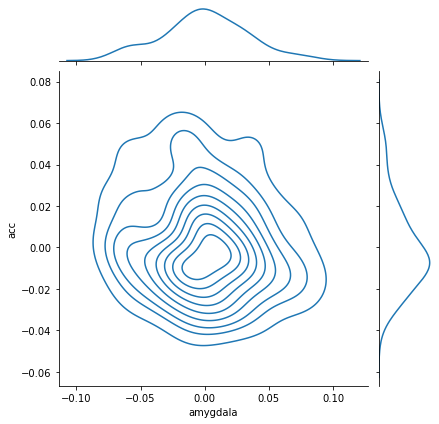

In [258]:
sns.jointplot(data = data, x = "amygdala", y = "acc", kind = 'kde')

Write something here

### Exercise (Gaussian process)

Generate $n = 200$ training data points $(x_1, y_1), \dots, (x_n, y_n)$ from the generative model:

$$
y_i = 0.2x_i \sin(x_i) + \varepsilon_i, \ \varepsilon_i \overset{i.i.d}{\sim} N(0, 0.5),
$$

where $i = 1, \dots, n$, the $x_i$’s are drawn from $\text{Unif}(-10, 10)$. In addition to this, generate $m = 100$ test data points, denoted by $x^\star_i$, $i = 1, \dots, m$, from $\text{Unif}(-15, 15)$ and compute the ground truth targets $f(x^\star_i) = 0.2 x_i^\star \sin(x^\star)$, $i = 1, \dots, m$.

Use the function ``gaussian_process.GaussianProcessRegressor`` in sklearn to fit Gaussian process regression to your data. 

1. Plot the ground truth $f(x^\star_i)$, $i = 1, \dots, m$, the predicted $\hat f(x_i)$, the error bars for the 95% posterior intervals from the GP regression on the _same_ plot. Be sure to clearly distinguish the true targets from the predicted $\hat f(x_i)$ and the 95% prediction intervals (e.g. using different colors and line styles), and include a legend with your plot.

__Solution:__


In [262]:
# Generate data required for the GP
n = 200
m = 100 

# Training data
x_train = np.random.uniform(-10, 10, size = n)
y_train = 0.2* x_train * np.sin(x_train) + np.random.normal(0, np.sqrt(0.5), size = n)

# Testing data
x_test = np.random.uniform(-15, 15, size = m).reshape(-1,1)
y_test = 0.2 * x_test * np.sin(x_test)

# True x values
x_true = np.linspace(-15, 15, 1000).reshape(-1,1)

In [263]:
# Defining the Gaussian Process
gaussian_process1 = GaussianProcessRegressor(kernel = kernels.ConstantKernel() * kernels.RBF(), alpha = 0.25, n_restarts_optimizer= 1000)
gaussian_process1.fit(x_train.reshape(-1, 1), y_train)

GaussianProcessRegressor(alpha=0.25, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=1000)

Text(0.5, 1.0, 'Gaussian Regression Plot')

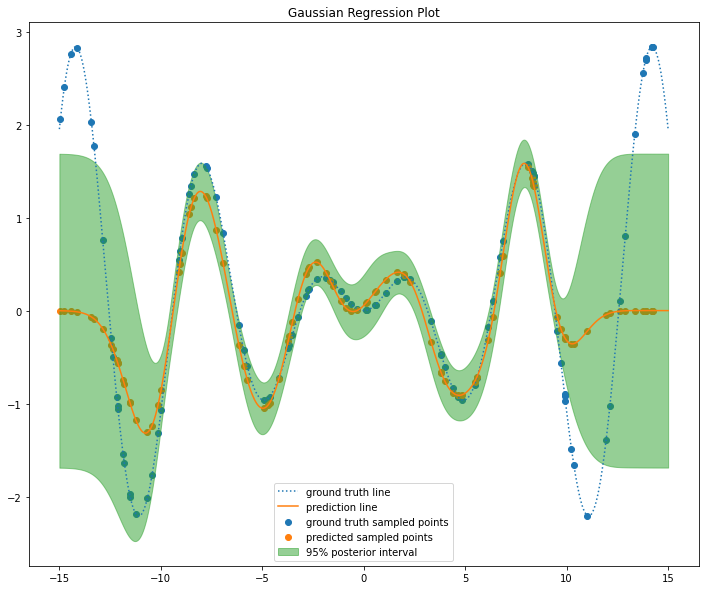

In [273]:
# Getting the prediction
mean_predictions_line, std_predictions_line = gaussian_process1.predict(x_true, return_std=True)
mean_predictions, std_predictions = gaussian_process1.predict(x_test, return_std=True)

y_true = 0.2* x_true * np.sin(x_true)

plt.figure(figsize=(12,10))
plt.plot(x_true, y_true, label='ground truth line', linestyle="dotted")

# samples of points from ground truth 
plt.scatter(x_test, y_test, label='ground truth sampled points')

# predicted line
plt.plot(x_true, mean_predictions_line, label='prediction line')

# # predicted sample points
plt.scatter(x_test, mean_predictions, label='predicted sampled points')

# add error interval
plt.fill_between(
    x_true.ravel(),
    mean_predictions_line - 1.96 * std_predictions_line,
    mean_predictions_line + 1.96 * std_predictions_line,
    color="tab:green",
    alpha=0.5,
    label=r"95% posterior interval",
)

# add legend
plt.legend(loc = 'lower center')

# add title
plt.title('Gaussian Regression Plot')



2. What is the optimal value for the parameters in Q1 (use ``get_params`` to find out)? Instead of using the default optimizer, choose two quite different initial start values by yourself and refit the function. Print out the estimated values for the parameters as well as the value of the log-marginal likelihood. Call the two predicted functions $\hat f_1(x_i)$ and $\hat f_2(x_i)$. Plot them along with $f(x^\star_i)$ and their 95% prediction intervals in two separate plots. Compare them to the plot in Q1. Comment on what you found and whether the algorithm is sensitive to the choice of initial values. 

__Solution:__

In [182]:
# optimal params
optimal_params = gaussian_process1.kernel_.get_params()
optimal_params

{'k1': 1**2,
 'k2': RBF(length_scale=1),
 'k1__constant_value': 1.0,
 'k1__constant_value_bounds': 'fixed',
 'k2__length_scale': 1.0,
 'k2__length_scale_bounds': 'fixed'}

In [277]:
gaussian_process2 = GaussianProcessRegressor(kernel = kernels.ConstantKernel() * kernels.RBF(), alpha = 10e-2, n_restarts_optimizer= 1000)
gaussian_process3 = GaussianProcessRegressor(kernel = kernels.ConstantKernel() * kernels.RBF(), alpha = 10e-1, n_restarts_optimizer= 1000)

gaussian_process2.fit(x_train.reshape(-1, 1), y_train)
gaussian_process3.fit(x_train.reshape(-1, 1), y_train)

GaussianProcessRegressor(alpha=1.0, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=1000)

Text(0.5, 1.0, 'Gaussian Regression Plot for alpha = 10e-2')

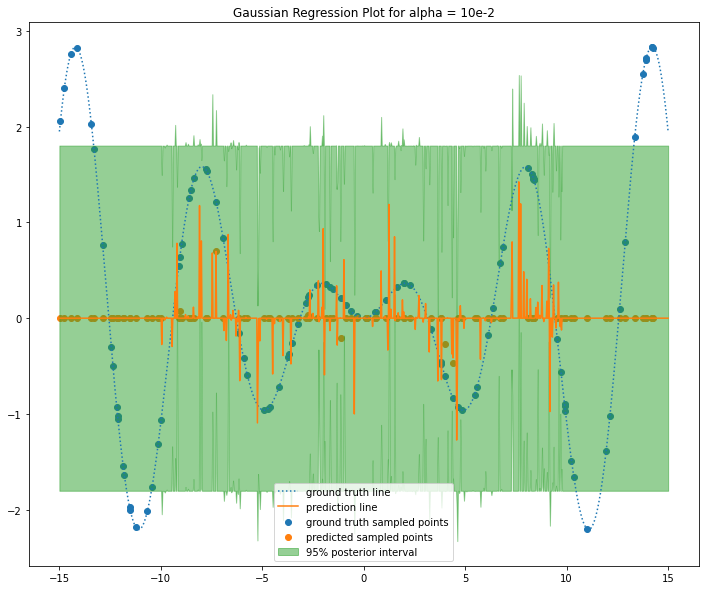

In [282]:
# Getting the prediction
mean_predictions_line, std_predictions_line = gaussian_process2.predict(x_true, return_std=True)
mean_predictions, std_predictions = gaussian_process2.predict(x_test, return_std=True)

y_true = 0.2* x_true * np.sin(x_true)

plt.figure(figsize=(12,10))
plt.plot(x_true, y_true, label='ground truth line', linestyle="dotted")

# samples of points from ground truth 
plt.scatter(x_test, y_test, label='ground truth sampled points')

# predicted line
plt.plot(x_true, mean_predictions_line, label='prediction line')

# # predicted sample points
plt.scatter(x_test, mean_predictions, label='predicted sampled points')

# add error interval
plt.fill_between(
    x_true.ravel(),
    mean_predictions_line - 1.96 * std_predictions_line,
    mean_predictions_line + 1.96 * std_predictions_line,
    color="tab:green",
    alpha=0.5,
    label=r"95% posterior interval",
)

# add legend
plt.legend(loc = 'lower center')

# add title
plt.title('Gaussian Regression Plot for alpha = 10e-2')

Text(0.5, 1.0, 'Gaussian Regression Plot for alpha = 10e-1')

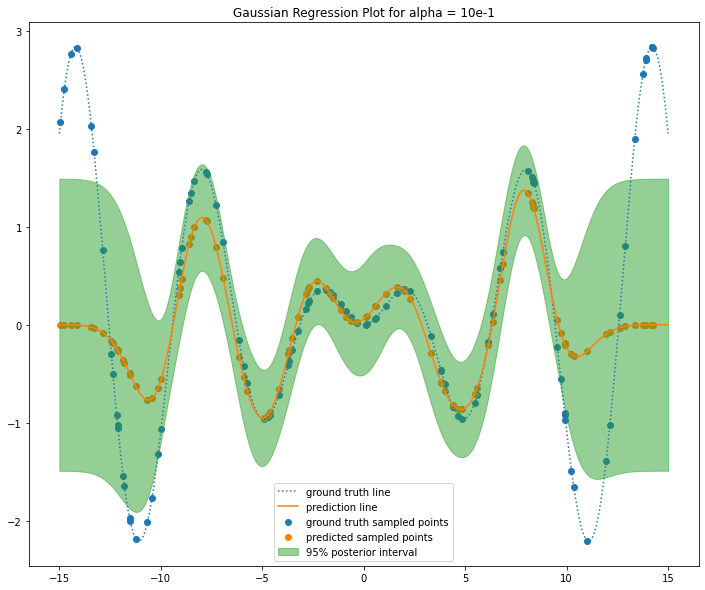

In [283]:
# Getting the prediction
mean_predictions_line, std_predictions_line = gaussian_process3.predict(x_true, return_std=True)
mean_predictions, std_predictions = gaussian_process3.predict(x_test, return_std=True)

y_true = 0.2* x_true * np.sin(x_true)

plt.figure(figsize=(12,10))
plt.plot(x_true, y_true, label='ground truth line', linestyle="dotted")

# samples of points from ground truth 
plt.scatter(x_test, y_test, label='ground truth sampled points')

# predicted line
plt.plot(x_true, mean_predictions_line, label='prediction line')

# # predicted sample points
plt.scatter(x_test, mean_predictions, label='predicted sampled points')

# add error interval
plt.fill_between(
    x_true.ravel(),
    mean_predictions_line - 1.96 * std_predictions_line,
    mean_predictions_line + 1.96 * std_predictions_line,
    color="tab:green",
    alpha=0.5,
    label=r"95% posterior interval",
)

# add legend
plt.legend(loc = 'lower center')

# add title
plt.title('Gaussian Regression Plot for alpha = 10e-1')

Algorithm is sensitive to the choice of initial values. We can see with Alpha = 0.1, the test values and the predictions follow similar patterns but with 0.01, the test values and the predictions dont follow similar patterns.

3. What is the default kernel used in the ``gaussian_process.GaussianProcessRegressor`` function? Replace the default kernel with the exponential sine squared kernel (aka periodic kernel). Re-do Q1, comparing the curve fitting with it in Q1. In this question, you can use the default optimizer.

__Solution:__

Default Kernel is RBF.

In [289]:
gaussian_process_exp_sine = GaussianProcessRegressor(kernel= kernels.ExpSineSquared(),alpha = 0.5 ** 2,  n_restarts_optimizer= 1000)
gaussian_process_exp_sine.fit(x_train.reshape(-1, 1), y_train)

GaussianProcessRegressor(alpha=0.25,
                         kernel=ExpSineSquared(length_scale=1, periodicity=1),
                         n_restarts_optimizer=1000)

Text(0.5, 1.0, 'Gaussian Regression Plot for kernel = kernels.ExpSineSquared()')

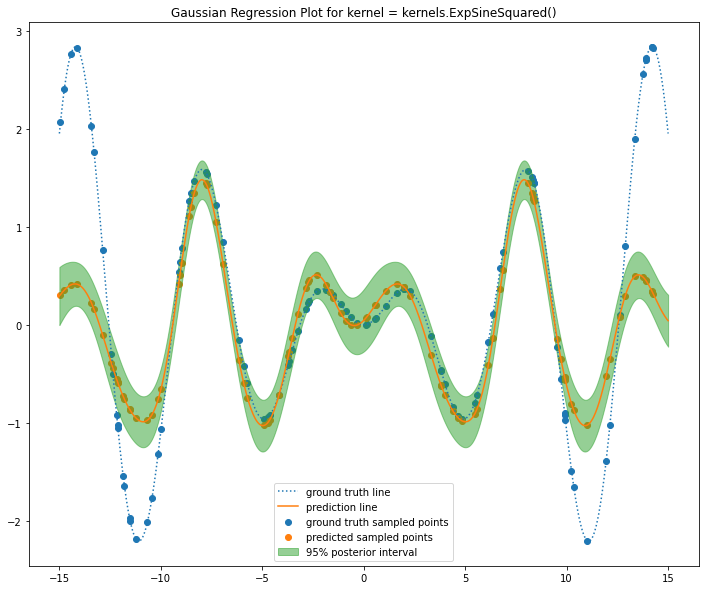

In [290]:
# Getting the prediction
mean_predictions_line, std_predictions_line = gaussian_process_exp_sine.predict(x_true, return_std=True)
mean_predictions, std_predictions = gaussian_process_exp_sine.predict(x_test, return_std=True)

y_true = 0.2* x_true * np.sin(x_true)

plt.figure(figsize=(12,10))
plt.plot(x_true, y_true, label='ground truth line', linestyle="dotted")

# samples of points from ground truth 
plt.scatter(x_test, y_test, label='ground truth sampled points')

# predicted line
plt.plot(x_true, mean_predictions_line, label='prediction line')

# # predicted sample points
plt.scatter(x_test, mean_predictions, label='predicted sampled points')

# add error interval
plt.fill_between(
    x_true.ravel(),
    mean_predictions_line.squeeze() - 1.96 * std_predictions_line.squeeze(),
    mean_predictions_line.squeeze() + 1.96 * std_predictions_line.squeeze(),
    color="tab:green",
    alpha=0.5,
    label=r"95% posterior interval",
)

# add legend
plt.legend(loc = 'lower center')

# add title
plt.title('Gaussian Regression Plot for kernel = kernels.ExpSineSquared()')